#### CMSE 201 Final Project
### &#9989; Amani Ahnuar
### &#9989; Section 002
#### &#9989; 4/15/2019

# PROJECT: ENERGY MOVEMENT IN BODY

## BACKGROUNG AND MOTIVATION
In our body, we take three macronutrients for use of our energy (calories) every day, in unit of *'kcal'* or much coventionally *'Cal'*. Those macronutrients are carbohydrate, protein, and fat. They are in other words known as 'main source of energy'. However, the problem we have is that how does this results in person to **looking more vascular** or in common term, ***'shredded'***. Within the confinement of that curiosity too, we will try to solve this problem by looking at some available strategies for diets.

The interesting part of this project is that we want to observe the amount of fat not the calorie consumption. Here, we will see how a certain diet will provide good solution to not *'look fat'* despite  **eating the same amount of calories**. We are not here concern of the health, but rather more about the aesthetic value of the physical body despite eating the same amount of calories (energy). The big question is **how will one diet provide the best solution**?

## METHODOLOGY
We will look at two models that explain how the movement of energy in the body, more specifically in glucose and fat storage with compartmental modelling. One model is depicting the general traditional and more common idea of energy movement in body. The second model will simulate the right movement of energy that is more prominent in the medical field. Lastly, we will see how one diet can be a solution of this problem and help people to eat the same amount of calories yet still look good and not bloated.

## Simplest Model: All Calories Are The Same
In our first step, we will model our problem with these assumptions in our mind:
1. We only consider carbohydrate and dietary fat intake since protein has very little amount of Cal per gram, Cal/g and protein also needs to undergo a certain breakdowns for its components to be used elsewhere in the body before used as our main source of energy. It is not considered mainly as the energy resource preference of body(4). This also means that we will be able to add its role later in our model with its own slower rate coefficients in future.
2. Energy storage is mainly as glucose. It is the most common form of energy converted in body before it is used by body, as glucose stored in muscle and liver. Energy also comes in as component stored in dietary fat.
3. Energy will go into both glucose and fat with regards of how many fractions/percentage of the diet consist of carbs and fat respectively.
3. Body uses energy from both dietary fat and glucose simultaneously assuming everyone is doing the normal average work daily. Later we can add up a compartment of activities if desired to see how it affects.

These assumptions smiplify our model into two compartments. This is how most people think about energy storage in our body where the approach of *"Eating Less"* looks very effective. This is also a good start to our problem. This model will approach as if people are not doing any more than normal average daily work. This is also known as CICO (Calories In Calories Out) hypothesis(4).

### Approach
There will be 2 compartments:
1. Glucose
2. Fat storage

Both of the compartments will have the energy movements such as follow:
1. Energy will go into both glucose and fat storage at the rate of their respective percentage in the diet carbs and dietary fat respectively. 
2. Energy will also go out from glucose and fat storage to be used by body at rate of lower than total daily energy expenditure (TDEE) per day as daily acitivies.
3. The model will run through a course of one day as 30 days starting from day 1 auntil day 30. This is so we can mamke the model realistic because many have said that it would take 4-6 weeks for us to see the physical change from the result of body transformation.
4. The amount of carbs and fat getting inside body is a fixed amount every day to mimic the diet of a normal person.

### The Standard Parameters
Here, we will establish a few standard parameters along with its range so that they can stay constant throughout our model also with next versions of models. The values must be of from reliable sources so we an keep it as realistically accurate as possible. First and foremost, *the total daily energy expenditure (TDEE) is at average of 3100 for men*(7). We assume the total daily *work done is the TDEE itself* to observe how people that do not exercise more than average. The percentage of carbs and dietary fat consumption is 80% and 20% respectively. We will also assume it will use both glucose and fat to do work with the same value of conversion to work so we can incorporate the 'All Calories Are The Same' mindset, thus 50% of the work done energy will come from the glucose and another 50% from the fat. Because of that, if too much energy is pulled from the fat it depletes, it will pull from the glucose. With all that information, we will make up parameters that suits the approach.

* TDEE: 3100 Cal (for men)
* Carbs diet: 60% from TDEE = 1860 Cal
* Dietary Fat diet: 40% from TDEE = 1240 Cal
* Total Work Done Rate: 3100 Cal per day
* Work energy from carbs: 50% from TDEE = 1550 Cal
* Work energy from fat: 50% from TDEE = 1550 Cal

In [1]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

Text(0.5, 1.0, 'Energy vs Time')

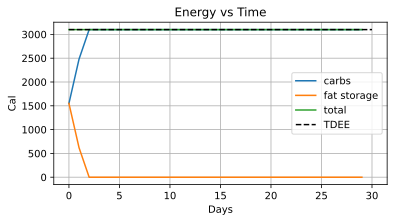

In [2]:
# Parameters
carbs_diet = 0.8    # In percentage of TDEE
fat_diet = 0.2      # In percentage of TDEE
carbs_work = 0.5    # In percentage of TDEE
fat_work = 0.5      # In percentage of TDEE
TDEE = 3100
work = TDEE
initialcarbs = 0.5  # In percentage of TDEE
initialfat = 0.5    # In percentage of TDEE

# Lists
glucose = [initialcarbs*TDEE]
fat = [initialfat*TDEE]
netcal = [glucose[-1] + fat[-1]]
time = [0]

for  t in range(1,30):
    newglucose = glucose[-1] + carbs_diet*TDEE - carbs_work*work    # Updates glucose
    newfat = fat[-1] + fat_diet*TDEE - fat_work*work    # Updates fat storage energy
    if newfat < 0:                       # Checks if fat is burned off
        newglucose -= abs(newfat)        # Body will burn carbs in return
        newfat = 0
    # Append
    time.append(t)
    glucose.append(newglucose)
    fat.append(newfat)
    netcal.append(newglucose+newfat)

# Plot
plt.figure(figsize=(6,3))
plt.plot(time, glucose, label='carbs')
plt.plot(time, fat, label='fat storage')
plt.plot(time, netcal, label='total')
plt.plot((0,30), (3100,3100), 'k--', label='TDEE')
plt.xlabel('Days')
plt.ylabel('Cal')
plt.grid()
plt.legend()
plt.title('Energy vs Time')

In [3]:
print('The amount of carbs at the end of the 30 days cycle of this diet is:', glucose[-1], 'Cal')
print('The amount of fat at the end of the 30 days cycle of this diet is:', fat[-1], 'Cal')
print('Total calories in excess:', netcal[-1] - TDEE, 'Cal')

The amount of carbs at the end of the 30 days cycle of this diet is: 3100.0 Cal
The amount of fat at the end of the 30 days cycle of this diet is: 0 Cal
Total calories in excess: 0.0 Cal


### What If The Diet is in Calorie Surplus?
In this scenario, we will assume that the body takes in extra calories. This is to assume that ocassionally, people do eat more than they are supposed to, which explains why people commonly gain weight. Here, let us assume the person takes in **5% more** than TDEE (equivalent to 155 Cal more) which 2.5% comes from carbs and 2.5% comes from fat. In principal this is still less than *the average American consumption of 3600 Cal*(7). In this scenario, it also depicts how people would gain weight by easy understanding of calories-in and calories-out.

Text(0.5, 1.0, 'Energy vs Time (5% Cal surplus)')

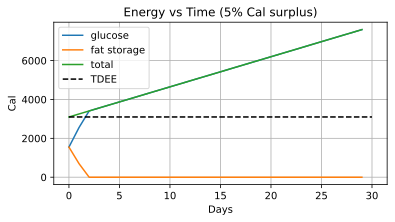

In [4]:
# Parameters
carbs_diet = 0.825  # In percentage of TDEE
fat_diet = 0.225    # In percentage of TDEE
carbs_work = 0.5    # In percentage of TDEE
fat_work = 0.5      # In percentage of TDEE
TDEE = 3100
work = TDEE
initialcarbs = 0.5  # In percentage of TDEE
initialfat = 0.5    # In percentage of TDEE

# Lists
glucose = [initialcarbs*TDEE]
fat = [initialfat*TDEE]
netcal = [glucose[-1] + fat[-1]]
time = [0]

for  t in range(1,30):
    newglucose = glucose[-1] + carbs_diet*TDEE - carbs_work*work    # Updates glucose
    newfat = fat[-1] + fat_diet*TDEE - fat_work*work    # Updates fat storage energy
    if newfat < 0:                       # Checks if fat is burned off
        newglucose -= abs(newfat)        # Body will burn carbs in return
        newfat = 0
    # Append
    time.append(t)
    glucose.append(newglucose)
    fat.append(newfat)
    netcal.append(newglucose+newfat)

# Plot
plt.figure(figsize=(6,3))
plt.plot(time, glucose, label='glucose')
plt.plot(time, fat, label='fat storage')
plt.plot(time, netcal, label='total')
plt.plot((0,30), (3100,3100), 'k--', label='TDEE')
plt.xlabel('Days')
plt.ylabel('Cal')
plt.grid()
plt.legend()
plt.title('Energy vs Time (5% Cal surplus)')

In [5]:
print('The amount of carbs at the end of the 30 days cycle of this diet is:', glucose[-1], 'Cal')
print('The amount of fat at the end of the 30 days cycle of this diet is:', fat[-1], 'Cal')
print('Total calories in excess:', netcal[-1] - TDEE, 'Cal')

The amount of carbs at the end of the 30 days cycle of this diet is: 7595.0 Cal
The amount of fat at the end of the 30 days cycle of this diet is: 0 Cal
Total calories in excess: 4495.0 Cal


## Realistic Model: Carbs Burns First, Fat Burns Later
This model is inspired by Dr. Fung's study of metabolism of human body where the energy movement in body actually is affected by the **presence of insulin** which manipulates the preference of body in *choosing energy source*.(1).
In our second step, we will model our problem with these assumptions in our mind where the only changes is in number **3 and 4**:
1. We still only consider carbohydrate and fat intake since protein have very little amount of Cal per gram, Cal/g and protein also needs to undergo a certain breakdowns for its components to be used elsewhere in the body before used as our main source of energy. It is not considered mainly as the energy resource preference of body. This also means that we will be able to add its role later in our model with its own slower rate coefficients.
2. Energy storage is still mainly as glucose. It is the most common form of energy converted in body before it is used by body, stored in muscle and liver. Energy also comes in as component stored in fat.
3. Energy will both converted into glucose even from dietary fat.
4. Body uses energy from both fat storage and glucose differently this time; it will use energy from glucose first until it decreases to a certain treshold that it starts using energy from the fat storage which is more realistic according to the researches.

These assumptions smiplify our model into two compartments but with **proper representation of how energy is used for work in body**(1). This is how the researches have shown the movement of energy in our body where the approach of *"Eating Less"* does not look like the good strategy(1). This model will approach as if people are not doing any more than normal average daily work.

### The Standard Parameters
Here, we will still use the same standard parameter as previously *except for that there is energy conversion from glucose to dietary fat* and most importantly, *the use of energy for work done every day*. This is because our body does convert glucose into fat and actually will only use energy from fat storage when energy from glucose almost depleted. Thus, we will develop a rate for the conversion of carbs to fat and an equation for the rate of energy usage from storage to depend inversely to carbs. Because we don't have any specific value, here we will assume the values for both.

Because of the fact that fat is more dense that carbs with Cal density of 9 Cal/g compared to 4 Cal/g every 6 to 8 hours, we will convert carbs to fat when carbs reaches a certain limit. The portion that turns into fat is only the glucose from carbs, the glucose from dietary fat will stay as glycogen. We will assume the rate of conversion from carbs to fat is 30% of carbs (not including dietary fat).

We know that the relation between glucose and fat energy usage is inversely proportional here, we will assume the simplest conversion rate: *work from fat/abs(1- carbs/minimum carbs)* on top of the previous equation. This is so that if the minimum carbs (cannot equals to 0) is reached, the value will be work from fat. This inverse conversion rate is to be assumed as insulin in Dr. Fung's model(1).

* TDEE: 3100 Cal (for men)
* Carbs diet: 60% from TDEE = 1860 Cal
* Dietary Fat diet: 40% from TDEE = 1240 Cal
* Glucose conversion rate to fat = 30% of carbs
* Total Work Done Rate: 3100 Cal per day
* Work energy from carbs: 50% from TDEE = 1550 Cal
* Work energy from fat: 50% from TDEE x 1/abs(carbs/minimum carbs - 1)

Text(0.5, 1.0, 'Energy vs Time')

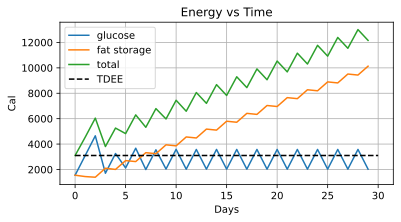

In [6]:
# Parameters
carbs_diet = 0.8  # In percentage of TDEE
fat_diet = 0.2    # In percentage of TDEE
carbs_to_fat = 0.3  # Conversion factor in percentage of TDEE
carbs_limit = 3100  # Maximum treshold in TDEE
mincarbs = 100      # Minimum treshold in TDEE
carbs_work = 0.5    # In percentage of TDEE
fat_work = 0.5      # In percentage of TDEE
TDEE = 3100
work = TDEE
initialcarbs = 0.5  # In percentage of TDEE
initialfat = 0.5    # In percentage of TDEE

# Lists
glucose = [initialcarbs*TDEE]
fat = [initialfat*TDEE]
netcal = [glucose[-1] + fat[-1]]
time = [0]

for  t in range(1,30):
    newglucose = glucose[-1] + carbs_diet*TDEE + fat_diet*TDEE - carbs_work*work  # Update glucose
    if glucose[-1] <= mincarbs:    # Checks if glucose is lower than minimum treshold
        glucose[-1] = 0            # and set it to 0 if so
        
    newfat = fat[-1] - fat_work*work/abs(1 - glucose[-1]/mincarbs)    # Update fat storage energy
    if glucose[-1] > carbs_limit:                             # Checks if glucose is more than maximum treshold
        newglucose = carbs_limit - carbs_to_fat*glucose[-1]   # Decrease it by the conversion to fat
        newfat += carbs_to_fat*carbs_diet*TDEE                # and add to fat if so
    # Append
    time.append(t)
    glucose.append(newglucose)
    fat.append(newfat)
    netcal.append(newglucose+newfat)
    
# Plot
plt.figure(figsize=(6,3))
plt.plot(time, glucose, label='glucose')
plt.plot(time, fat, label='fat storage')
plt.plot(time, netcal, label='total')
plt.plot((0,30), (3100,3100), 'k--', label='TDEE')
plt.xlabel('Days')
plt.ylabel('Cal')
plt.grid()
plt.legend(loc='best')
plt.title('Energy vs Time')

In [7]:
print('The amount of carbs at the end of the 30 days cycle of this diet is:', glucose[-1], 'Cal')
print('The amount of fat at the end of the 30 days cycle of this diet is:', fat[-1], 'Cal')
print('Total calories in excess:', netcal[-1] - TDEE, 'Cal')

The amount of carbs at the end of the 30 days cycle of this diet is: 2026.9231282480134 Cal
The amount of fat at the end of the 30 days cycle of this diet is: 10131.248227517572 Cal
Total calories in excess: 9058.171355765586 Cal


### What If The Diet is in Calorie Surplus?
In this scenario, we will assume that the body takes in extra calories just like previous one. Here, let us assume the same thing, the person takes in 5% more than TDEE (equivalent to 155 Cal more) which 2.5% comes from carbs and 2.5% comes from fat. In principal, this is still less than the average American consumption of 3600 Cal.

Text(0.5, 1.0, 'Energy vs Time (5% Cal surplus)')

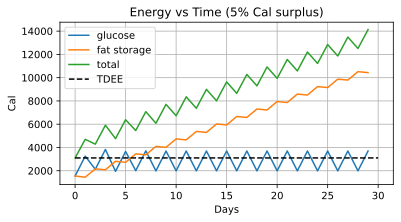

In [8]:
# Parameters
carbs_diet = 0.825  # In percentage of TDEE
fat_diet = 0.225    # In percentage of TDEE
carbs_to_fat = 0.3  # Conversion factor in percentage of TDEE
carbs_limit = 3100  # Maximum treshold in TDEE
mincarbs = 100      # Minimum treshold in TDEE
carbs_work = 0.5    # In percentage of TDEE
fat_work = 0.5      # In percentage of TDEE
TDEE = 3100
work = TDEE
initialcarbs = 0.5  # In percentage of TDEE
initialfat = 0.5    # In percentage of TDEE

# Lists
glucose = [initialcarbs*TDEE]
fat = [initialfat*TDEE]
netcal = [glucose[-1] + fat[-1]]
time = [0]

for  t in range(1,30):
    newglucose = glucose[-1] + carbs_diet*TDEE + fat_diet*TDEE - carbs_work*work  # Update glucose
    if glucose[-1] <= mincarbs:    # Checks if glucose is lower than minimum treshold
        glucose[-1] = 0            # and set it to 0 if so
        
    newfat = fat[-1] - fat_work*work/abs(1 - glucose[-1]/mincarbs)    # Update fat storage energy
    if glucose[-1] > carbs_limit:                             # Checks if glucose is more than maximum treshold
        newglucose = carbs_limit - carbs_to_fat*glucose[-1]   # Decrease it by the conversion to fat
        newfat += carbs_to_fat*carbs_diet*TDEE                # and add to fat if so
    # Append
    time.append(t)
    glucose.append(newglucose)
    fat.append(newfat)
    netcal.append(newglucose+newfat)

# Plot
plt.figure(figsize=(6,3))
plt.plot(time, glucose, label='glucose')
plt.plot(time, fat, label='fat storage')
plt.plot(time, netcal, label='total')
plt.plot((0,30), (3100,3100), 'k--', label='TDEE')
plt.xlabel('Days')
plt.ylabel('Cal')
plt.grid()
plt.legend(loc='best')
plt.title('Energy vs Time (5% Cal surplus)')

In [9]:
print('The amount of carbs at the end of the 30 days cycle of this diet is:', glucose[-1], 'Cal')
print('The amount of fat at the end of the 30 days cycle of this diet is:', fat[-1], 'Cal')
print('Total calories in excess:', netcal[-1] - TDEE, 'Cal')

The amount of carbs at the end of the 30 days cycle of this diet is: 3696.153825053594 Cal
The amount of fat at the end of the 30 days cycle of this diet is: 10432.86114611149 Cal
Total calories in excess: 11029.014971165085 Cal


## The Solution: High Fat Low Carbs Diet
I have chose the **keto diet** structure as an observation. This is because it has been the new mainstream diet. Keto diet is a **high-fat, adequate-protein, low-carbohydrate diet**. Commonly, many said that this diet consists of 70% fat, 25% protein and 5% carbs. Nevertheless, we understand that it has significantly high amount of fat relative to carbs. This diet is chosen due to the fact that it has been viraled because of the result it comes with(1). Here, we will assume 70% fat, 4% carbs ignoring the protein in diet.

Text(0.5, 1.0, 'Energy vs Time')

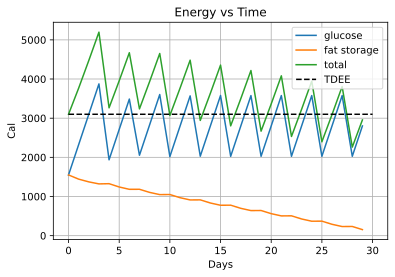

In [10]:
# Parameters
carbs_diet = 0.05  # In percentage of TDEE
fat_diet = 0.7    # In percentage of TDEE
carbs_to_fat = 0.3  # Conversion factor in percentage of TDEE
carbs_limit = 3100  # Maximum treshold in TDEE
mincarbs = 100      # Minimum treshold in TDEE
carbs_work = 0.5    # In percentage of TDEE
fat_work = 0.5      # In percentage of TDEE
TDEE = 3100
work = TDEE
initialcarbs = 0.5  # In percentage of TDEE
initialfat = 0.5    # In percentage of TDEE

# Lists
glucose = [initialcarbs*TDEE]
fat = [initialfat*TDEE]
netcal = [glucose[-1] + fat[-1]]
time = [0]

for  t in range(1,30):
    newglucose = glucose[-1] + carbs_diet*TDEE + fat_diet*TDEE - carbs_work*work  # Update glucose
    if glucose[-1] <= mincarbs:    # Checks if glucose is lower than minimum treshold
        glucose[-1] = 0            # and set it to 0 if so
        
    newfat = fat[-1] - fat_work*work/abs(1 - glucose[-1]/mincarbs)    # Update fat storage energy
    if glucose[-1] > carbs_limit:                             # Checks if glucose is more than maximum treshold
        newglucose = carbs_limit - carbs_to_fat*glucose[-1]   # Decrease it by the conversion to fat
        newfat += carbs_to_fat*carbs_diet*TDEE                # and add to fat if so
    # Append
    time.append(t)
    glucose.append(newglucose)
    fat.append(newfat)
    netcal.append(newglucose+newfat)

# Plot
plt.plot(time, glucose, label='glucose')
plt.plot(time, fat, label='fat storage')
plt.plot(time, netcal, label='total')
plt.plot((0,30), (3100,3100), 'k--', label='TDEE')
plt.xlabel('Days')
plt.ylabel('Cal')
plt.grid()
plt.legend(loc='best')
plt.title('Energy vs Time')

In [11]:
print('The amount of carbs at the end of the 30 days cycle of this diet is:', glucose[-1], 'Cal')
print('The amount of fat at the end of the 30 days cycle of this diet is:', fat[-1], 'Cal')
print('Total calories in excess:', netcal[-1] - TDEE, 'Cal')

The amount of carbs at the end of the 30 days cycle of this diet is: 2801.9172098750005 Cal
The amount of fat at the end of the 30 days cycle of this diet is: 154.17587616868286 Cal
Total calories in excess: -143.90691395631666 Cal


## RESULTS

## First Model:
In the first model, we can see that if people are eating the same amount of energy as their TDEE, they will have a very low fat storage. When they eat in a surplus in which they exceed their TDEE, they have excess energy from carbs.

## Second Model:
In the second model (realistic), we can see that if people are eating the same amount of energy as their TDEE, they will have excess of energy mostly from fat storage. When they eat in surplus, it gives the same result with a little bigger magnitude.

## Solution:
In the solution, we can see that if people are eating high dietary fat and low carbs, they will still have excess energy but are not from fat storage.

## DISCUSSION

In the first model with surplus, the excess energy is from glucose. This means that the excess glucose has the possibility to turn into glycogen and be stored in the liver and muscle. This will not affect much to the contribution of *'fatty look'* since the fat storage energy is low. The amount of glucose is: ***7595 Cal at the end of the month***.

However, in the second model with surplus, excess energy is from mostly fat storage. This means that the excess energy is in fat form where the *'fatty look'* comes from. The fat storage is the **subcutaneous fat** which is the fat that is under the skin. This is not the fat wrapping our organs (visceral fat). This is the fat that make someone looks puffy and bloated. The total amount of fat storage is: ***10432 Cal at the end of the month***.

The solution to this is to have a *'High Fat Low Carbs'* diet (HFLC diet). This diet will produce the best result in reducing the fat storage in body. While this does not guarantee anything in terms of health, it does show that it reduces fat storage in body. The amount of fat storage is: ***154 Cal at the end of the month***.

The reason behind this is because **our body prefer to use energy from glucose first before going into fat storage** because the conversion is tedious and not worth the time when glucose is always readily available in the stomach(6). So, when the body burns a lot of the energy from glucose to a treshold point, only then it will start burns the energy from fat storage.

## Scientific Proofs
The Randle cycle has proven the process of body to burn glucose preferrably tha|n fat due to insulin control(5). Sometimes this is also known as *'the glucose-fatty acid cycle'*. Dr. Jason Fung also has showed in his metabolic study that the insulin level at play is the reason of great weight loss(1). He recommends fasting to control the body metabolism so that it will prefer to burn fat storage most of the time(1). Ruben Meerman and Andrew Brown also support this same idea of process(6).

## Obstacles
In running these models, there are some obstacles worth noting. One of the biggest problems is that there are no clear fixed value for the  conversion rate of carbs to fat. The same thing goes to the treshold minimum limit of carbs before the body starts using fat storage as energy fuel. Aside from that, we only consider the male body type TDEE. Most importantly, these are models with assumptions protein is ignored. While all these models might make sense and agree with a lot of the previous articles and literature, the obstacles here present are the main boundary to making it as realistic as possible. This model might picture a good solution to looking aestheticallt good, however, the results do not say anything about the body health considering eating larger amount of fat.

## CONCLUSION
From these models, we can finally draw some conclusions.

1. The CICO hypthesis of model for energy movement in body does not make sense because it means people will not look fat even when eating on a calorie surplus.
2. The second model with presence of insulin makes more sense how people look fat as they gain weight.
3. The keto diet or any HFLC-related diet seems to provide a great result on reducing the amount of fat storage energy in body.

## REFERENCE

1. Admin. “The Two-Compartment Model.” We Love Fat, 30 July 2018, https://welovefat.net/the-two-compartment-model/.
2. Bruso, Jessica. “Glycogen &amp; Triglycerides.” Healthfully, 10 Jan. 2019, https://healthfully.com/349952-glycogen-triglycerides.html.
3. Coleman, Erin, and L.d. “Each Gram of Protein &amp; Carbohydrates Contains How Many Kilocalories?” Healthy Eating | SF Gate, 14 Dec. 2018, https://healthyeating.sfgate.com/gram-protein-carbohydrates-contains-many-kilocalories-5978.html.
4. Fung, Jason. “Obesity - Solving the Two-Compartment Problem - Fasting 21.” Intensive Dietary Management (IDM), 25 Apr. 2018, https://idmprogram.com/obesity-solving-the-two-compartment-problem/.
5. Hue, Louis, and Heinrich Taegtmeyer. “The Randle Cycle Revisited: a New Head for an Old Hat.” American Journal of Physiology. Endocrinology and Metabolism, American Physiological Society, Sept. 2009, www.ncbi.nlm.nih.gov/pmc/articles/PMC2739696/.
6. Patel, Arti. “Scientists Say Burned Fat Isn't Converted into Energy - Here's Where It Goes.” Global News, 20 Mar. 2018, https://globalnews.ca/news/4091907/how-do-you-burn-fat/.
7. Renee, Janet. “The Average Calorie Intake by a Human Per Day Versus the Recommendation.” Healthy Eating | SF Gate, 2 Dec. 2018, https://healthyeating.sfgate.com/average-calorie-intake-human-per-day-versus-recommendation-1867.html.